In [2]:
import os
import random

from collections import OrderedDict
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [5, 5]
matplotlib.rcParams['figure.dpi'] = 200

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import torchvision.models as models


from data_helper import UnlabeledDataset, LabeledDataset
from helper import collate_fn, draw_box, compute_ts_road_map
from hrnet import get_seg_model, get_config

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


In [4]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0);

In [5]:
image_folder = '../data'
annotation_csv = '../data/annotation.csv'

In [6]:
labeled_scene_index = np.arange(106, 134)

In [7]:
train_index = np.arange(106,108)
val_index = np.arange(128,130)

transform = torchvision.transforms.ToTensor()

labeled_trainset = LabeledDataset(
    image_folder=image_folder,
    annotation_file=annotation_csv,
    scene_index=train_index,
    transform=transform,
    extra_info=False
    )

labeled_valset = LabeledDataset(
    image_folder=image_folder,
    annotation_file=annotation_csv,
    scene_index=val_index,
    transform=transform,
    extra_info=False
    )

trainloader = torch.utils.data.DataLoader(labeled_trainset, batch_size=2, shuffle=True, num_workers=2, collate_fn=collate_fn)
valloader = torch.utils.data.DataLoader(labeled_valset, batch_size=1, shuffle=True, num_workers=2, collate_fn=collate_fn)

In [8]:
model = get_seg_model(get_config()).to(device)
model.load_state_dict(torch.load('../PT_FILES/HRNET_RM_pretrain03.pt', map_location=device))

<All keys matched successfully>

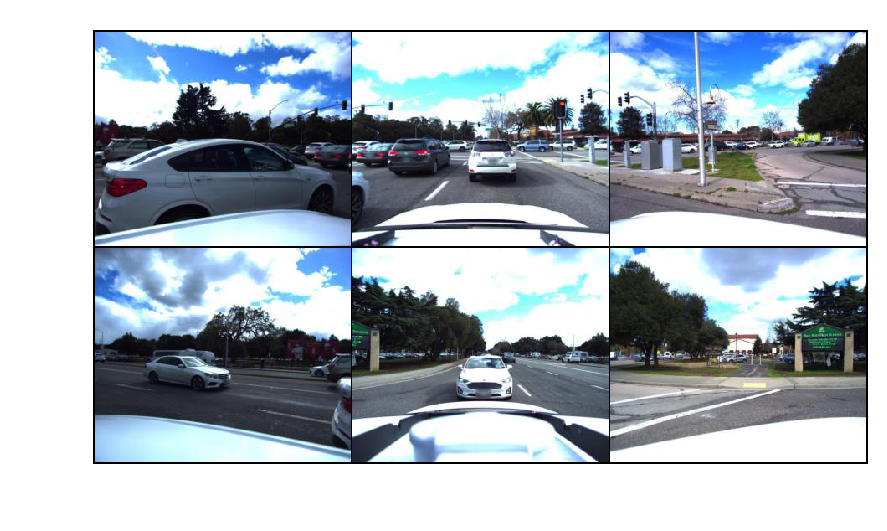

In [9]:
sample, target, road_image = iter(valloader).next()

plt.imshow(torchvision.utils.make_grid(sample[0], nrow=3).numpy().transpose(1, 2, 0))
plt.axis('off');

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


Text(0.5, 1.0, 'Predicted Road')

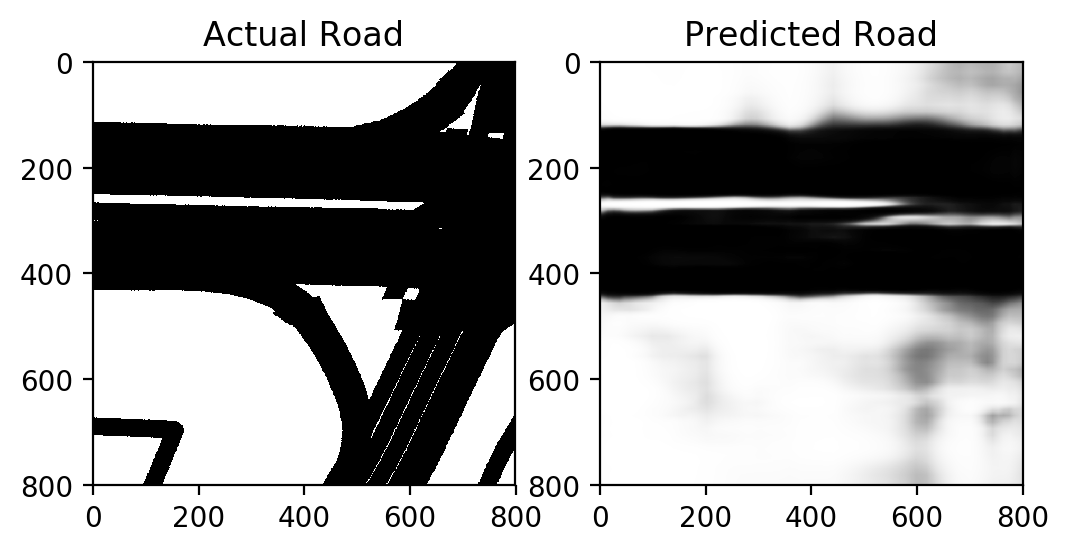

In [10]:
matplotlib.rcParams['figure.figsize'] = [6, 6]

# Visualize results

image = sample[0].view(-1, 256, 306)


model.eval()
output = model(image.unsqueeze(0).to(device))
# Predicted road image
out_map = (output > 0.5).float()



# True road image and Predicted Road Image
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(road_image[0], cmap='binary')
ax1.set_title('Actual Road')
ax2.imshow(output.cpu().detach().numpy().squeeze(0), cmap='binary')
ax2.set_title('Predicted Road')


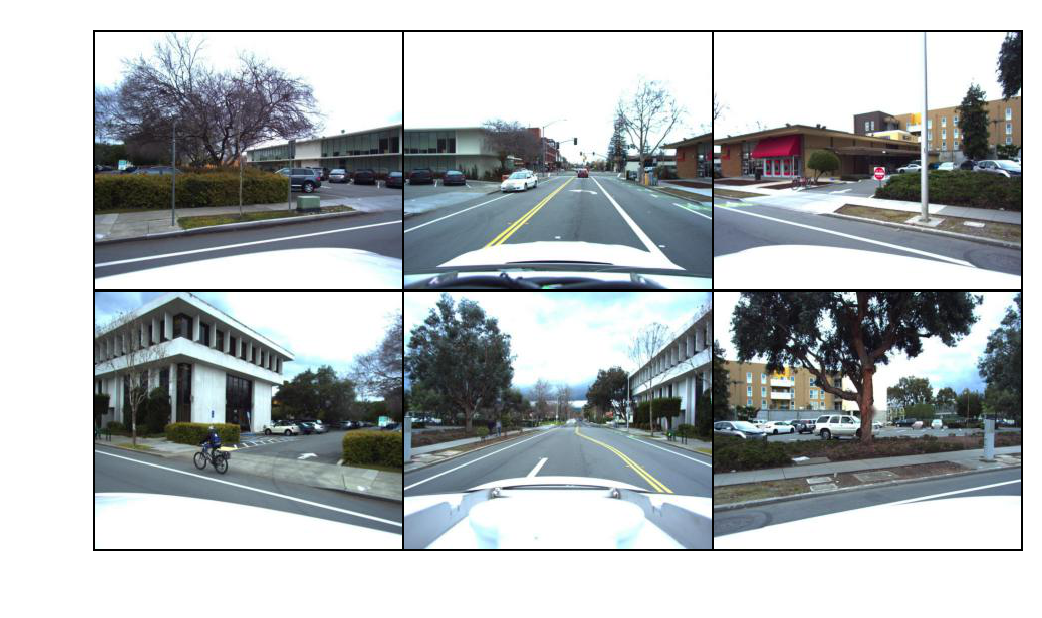

In [11]:
sample, target, road_image = iter(trainloader).next()

plt.imshow(torchvision.utils.make_grid(sample[0], nrow=3).numpy().transpose(1, 2, 0))
plt.axis('off');

Text(0.5, 1.0, 'Predicted Road')

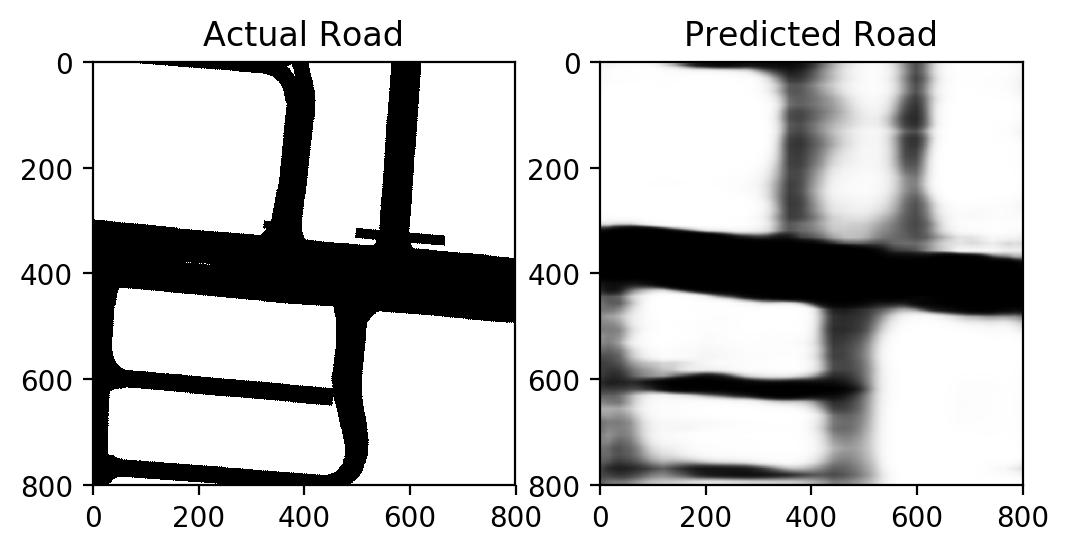

In [12]:
matplotlib.rcParams['figure.figsize'] = [6, 6]

# Visualize results
image = sample[0].view(-1, 256, 306)


model.eval()
output = model(image.unsqueeze(0).to(device))
# Predicted road image
out_map = (output > 0.5).float()



# True road image and Predicted Road Image
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(road_image[0], cmap='binary')
ax1.set_title('Actual Road')
ax2.imshow(output.cpu().detach().numpy().squeeze(0), cmap='binary')
ax2.set_title('Predicted Road')
